In [1]:
!pip install backtrader

     |████████████████████████████████| 419kB 5.0MB/s 


In [2]:
import backtrader as bt
import datetime
import pandas as pd



In [3]:
class Strategy(bt.Strategy):

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(period=10)
        self.dataclose = self.datas[0].close
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None


    def prenext(self):
        self.log('Close, %.2f' % self.dataclose[0])

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])
        #Si hay un orden en curso no hacer nada
        if self.order:
            return
        if not self.position:

            if self.sma < self.dataclose[0]:
              self.buy()
              self.log('BUY CREATE, %.2f' % self.dataclose[0])
        else:
            if self.sma > self.dataclose[0]:
              self.sell()
              self.log('SELL CREATE, %.2f' % self.dataclose[0])
    def stop(self):
        print(self.position)
   





In [4]:
cerebro = bt.Cerebro()

cerebro.addstrategy(Strategy)

data = bt.feeds.YahooFinanceData(
    dataname='AMZN',
    fromdate=datetime.datetime(2018, 1, 1),
    todate=datetime.datetime(2018, 12, 31),
    reverse=False)

cerebro.adddata(data)

cerebro.broker.setcash(10000.0)

cerebro.broker.setcommission(commission=0.001)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 10000.00
2018-01-02, Close, 1189.01
2018-01-03, Close, 1204.20
2018-01-04, Close, 1209.59
2018-01-05, Close, 1229.14
2018-01-08, Close, 1246.87
2018-01-09, Close, 1252.70
2018-01-10, Close, 1254.33
2018-01-11, Close, 1276.68
2018-01-12, Close, 1305.20
2018-01-16, Close, 1304.86
2018-01-16, BUY CREATE, 1304.86
2018-01-17, BUY EXECUTED, 1312.24
2018-01-17, Close, 1295.00
2018-01-18, Close, 1293.32
2018-01-19, Close, 1294.58
2018-01-22, Close, 1327.31
2018-01-23, Close, 1362.54
2018-01-24, Close, 1357.51
2018-01-25, Close, 1377.95
2018-01-26, Close, 1402.05
2018-01-29, Close, 1417.68
2018-01-30, Close, 1437.82
2018-01-31, Close, 1450.89
2018-02-01, Close, 1390.00
2018-02-02, Close, 1429.95
2018-02-05, Close, 1390.00
2018-02-05, SELL CREATE, 1390.00
2018-02-06, SELL EXECUTED, 1361.46
2018-02-06, Close, 1442.84
2018-02-06, BUY CREATE, 1442.84
2018-02-07, BUY EXECUTED, 1449.00
2018-02-07, Close, 1416.78
2018-02-08, Close, 1350.50
2018-02-08, SELL CREATE, 1350.50
201

<IPython.core.display.Javascript object>

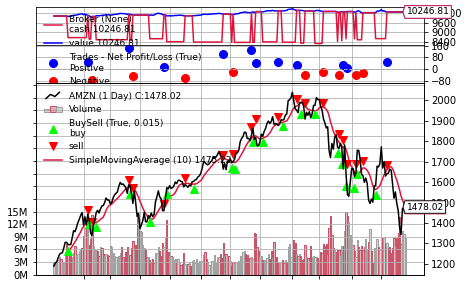

In [5]:
cerebro.plot()[0][0]